# Assignment

Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#these are the libraries we will be using

# Dataset Overview

In [2]:
df = pd.read_csv("ToyotaCorolla - MLR.csv") 
#importing and storing our datasets

In [3]:
df.head() # top 5 rows of the dataset

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [4]:
df.tail() #last 5 rows of the dataset

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


# Dataset Description:
 The dataset consists of the following variable:
 
 Age: Age in years
 
 KM: Accumulated Kilometers on odometer
 
 FuelType: FuelType ( Petrol, Diesel, CNG)
 
 HP: Horse Power
 
 Automatic: Automatic(Yes=1, No=0)
 
 CC: Cylinder Volumne in cubic centimeters
 
 Doors: Numbers of doors 
 
 
 Weight: Weight in Kilograms
 
 Gears: Number of gear
 
 Cylinder: Number of cylinders
 
 Price: Offer Price in EUROs

In [5]:
df.shape #Dimension(rows X columns ) of our dataset

(1436, 11)

In [6]:
df.info() #information about our dataset including null values, datatype, memory usage with number of rows and columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [7]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1435, 11)

In [12]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [13]:
df['Fuel_Type'] = df['Fuel_Type'].astype('string')

In [14]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    string
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [15]:
df.rename(columns = {'Age_08_04':'Age'}, inplace = True) #changing the column name of age

In [16]:
df.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# EDA

In [17]:
for i in df.columns:
    print(df[i].value_counts())
#how many values are present for each column    
    

8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: Price, Length: 236, dtype: int64
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age, Length: 77, dtype: int64
36000    9
1        8
59000    7
43000    7
45000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: KM, Length: 1263, dtype: int64
Petrol    1264
Diesel     154
CNG         17
Name: Fuel_Type, dtype: Int64
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: HP, dtype: int64
0    1355
1      80
Name: Automatic, dtype: int64
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64
5    673
3    622
4    138
2      2
Name: Doors, dtyp

Numerical Columns are: Price, Age, KM, HP,CC, Weight
Categorical Columns are: Fuel_Type, Automatic, Doors, Cylinders, Gears.

# Univariate analysis on numerical columns

Price Column

The avg price of the car is 10721.

The min price is 4350.

The max price is 32500.

The care having price greater than 25000 are brought 
by people of age 4 which is not possible in real life.

This column has no null values.

The data is skewed

In [18]:
df['Price'].describe()

count     1435.000000
mean     10720.915679
std       3608.732978
min       4350.000000
25%       8450.000000
50%       9900.000000
75%      11950.000000
max      32500.000000
Name: Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

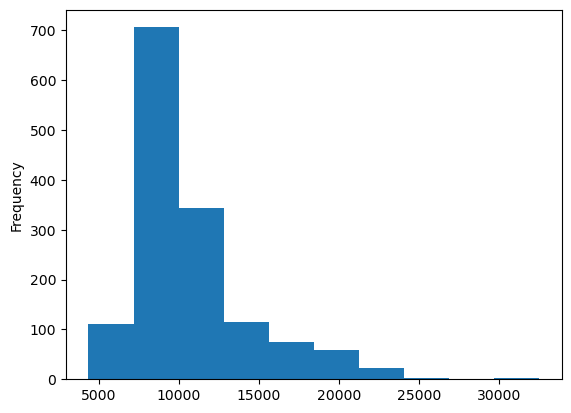

In [19]:
df['Price'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

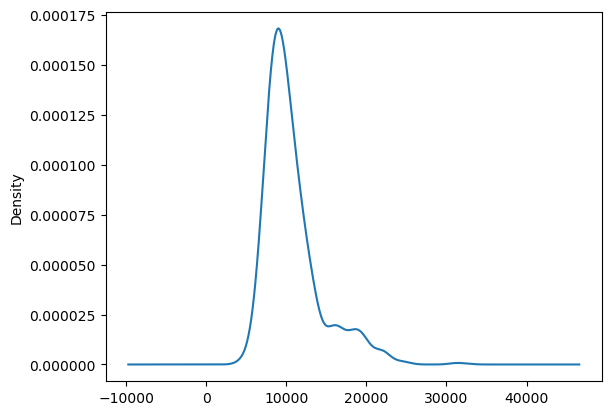

In [20]:
df['Price'].plot(kind='kde')

In [21]:
df.Price.skew()

1.6965785809803777

In [22]:
df.Price.isnull().sum()

0

<AxesSubplot:>

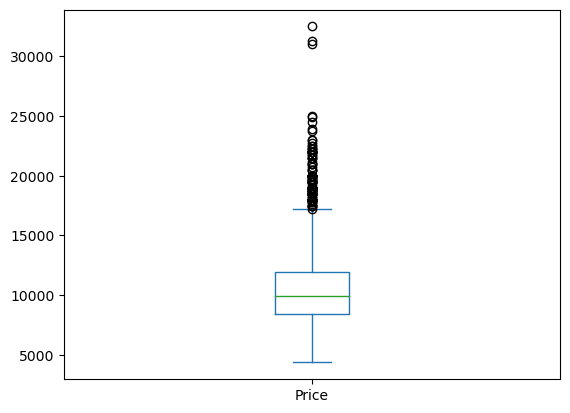

In [23]:
df['Price'].plot(kind='box')

In [24]:
df[df['Price'] > 25000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480


# Age Column

minimum age is 1.

maximum age is 80.

mean age is 55.

no null values

Outliers have age less than 10

Skewed data

In [25]:
df['Age'].describe()

count    1435.000000
mean       55.980488
std        18.563312
min         1.000000
25%        44.000000
50%        61.000000
75%        70.000000
max        80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

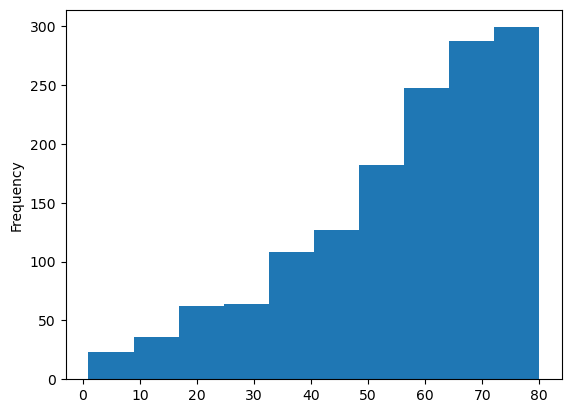

In [26]:
df['Age'].plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

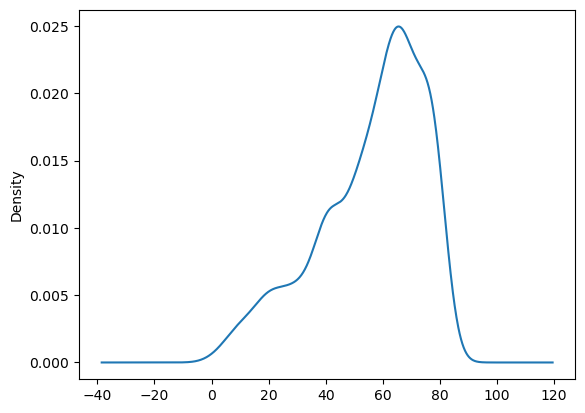

In [27]:
df['Age'].plot(kind = 'kde')

In [28]:
df['Age'].skew()

-0.8255666018465969

In [29]:
df['KM'].describe()

count      1435.000000
mean      68571.782578
std       37491.094553
min           1.000000
25%       43000.000000
50%       63451.000000
75%       87041.500000
max      243000.000000
Name: KM, dtype: float64

<AxesSubplot:ylabel='Frequency'>

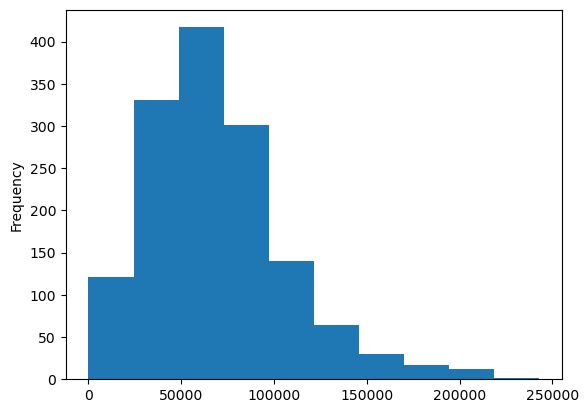

In [30]:
df['KM'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

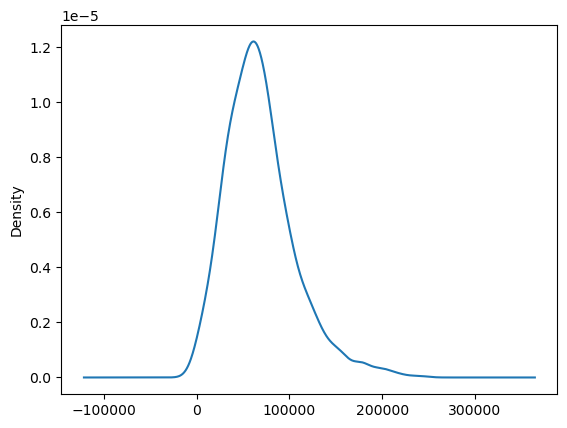

In [31]:
df['KM'].plot(kind ='kde')

In [32]:
df['Age'].skew()

-0.8255666018465969

In [33]:
df['Age'].isnull().sum()

0

<AxesSubplot:>

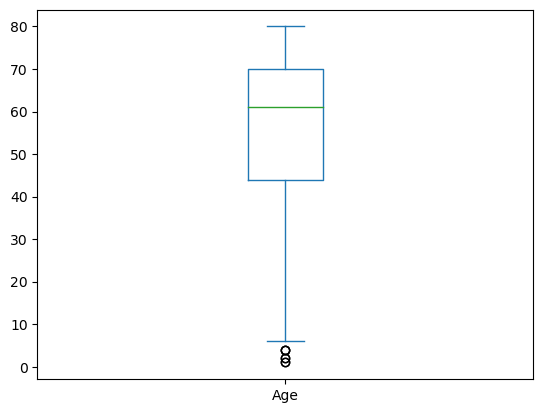

In [34]:
df['Age'].plot(kind = 'box')

In [35]:
df[df['Age'] < 11]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
109,32500,4,1,Diesel,116,0,2000,5,4,5,1480
110,31000,4,4000,Diesel,116,0,2000,5,4,5,1480
111,31275,4,1500,Diesel,116,0,2000,5,4,5,1480
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
114,22950,7,10000,Diesel,116,0,2000,5,4,5,1270
115,24990,8,6000,Diesel,90,0,2000,5,4,5,1280
116,21950,8,10841,Diesel,90,0,2000,5,4,5,1270
117,17900,7,1,Petrol,110,0,1600,3,4,5,1105
152,18450,10,13747,Petrol,97,0,1400,5,4,5,1110
162,19600,9,7650,Petrol,110,0,1600,5,4,5,1115


# HP Column

minimum horse power is 69

maximum horse power is 192

average horse power is 101

We have 11 outliers which have horse power 192 and their weight is almost same and all uses petrol as their fuel.

No null values

The data is skewed.

In [36]:
df['HP'].describe()

count    1435.000000
mean      101.491986
std        14.981408
min        69.000000
25%        90.000000
50%       110.000000
75%       110.000000
max       192.000000
Name: HP, dtype: float64

<AxesSubplot:ylabel='Frequency'>

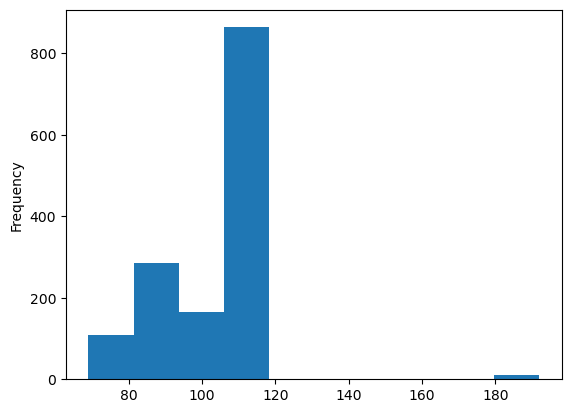

In [37]:
df['HP'].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

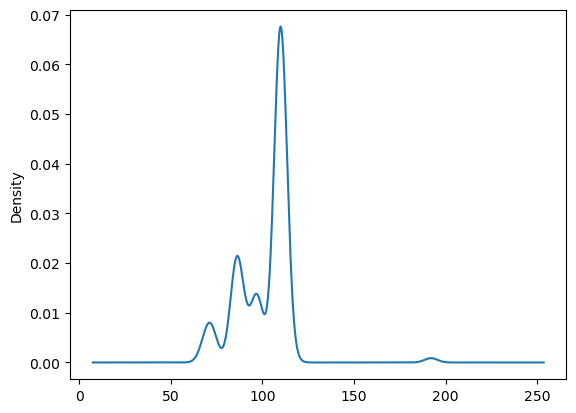

In [38]:
df['HP'].plot(kind='kde')

In [39]:
df['HP'].skew()

0.9578333639343268

In [40]:
df.HP.isnull().sum()

0

<AxesSubplot:>

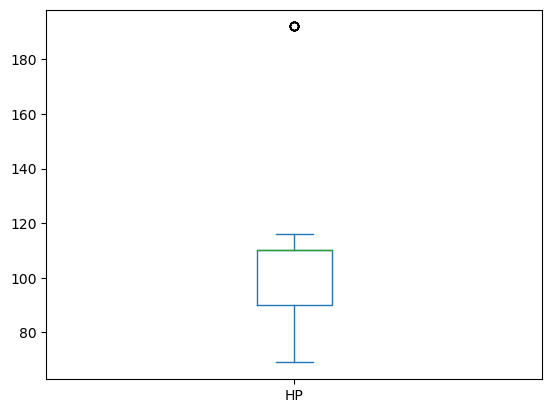

In [41]:
df.HP.plot(kind = 'box')

In [42]:
print(len(df[df.HP > 120]))
df[df.HP > 120]

11


,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
8,21500,27,19700,Petrol,192,0,1800,3,4,5,1185
10,20950,25,31461,Petrol,192,0,1800,3,4,6,1185
11,19950,22,43610,Petrol,192,0,1800,3,4,6,1185
12,19600,25,32189,Petrol,192,0,1800,3,4,6,1185
13,21500,31,23000,Petrol,192,0,1800,3,4,6,1185
14,22500,32,34131,Petrol,192,0,1800,3,4,6,1185
15,22000,28,18739,Petrol,192,0,1800,3,4,6,1185
16,22750,30,34000,Petrol,192,0,1800,3,4,5,1185
49,21950,31,64982,Petrol,192,0,1800,5,4,6,1195
53,21950,27,49866,Petrol,192,0,1800,5,4,5,1195


# CC Column

Minimum cc is 1300

Maximum cc is 1600

Averge cc is 1576

No null values

Highly skewed data

One outlier with cc 16000(bad for our model).

In [43]:
df['cc'].describe()

count     1435.000000
mean      1576.560976
std        424.387533
min       1300.000000
25%       1400.000000
50%       1600.000000
75%       1600.000000
max      16000.000000
Name: cc, dtype: float64

<AxesSubplot:ylabel='Frequency'>

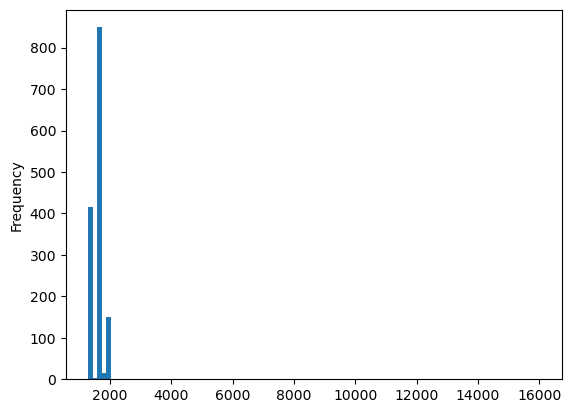

In [44]:
df['cc'].plot(kind='hist', bins=100)

<AxesSubplot:ylabel='Density'>

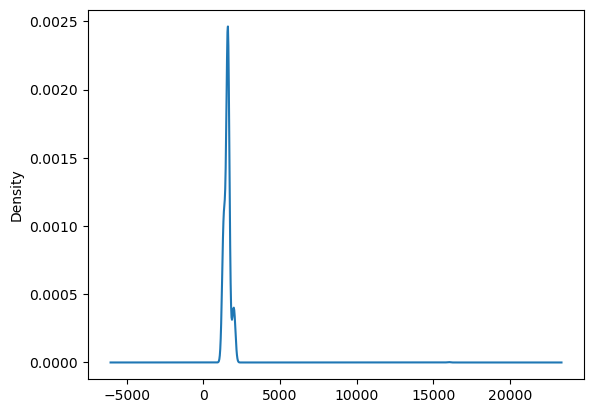

In [45]:
df['cc'].plot(kind='kde')

<AxesSubplot:ylabel='Frequency'>

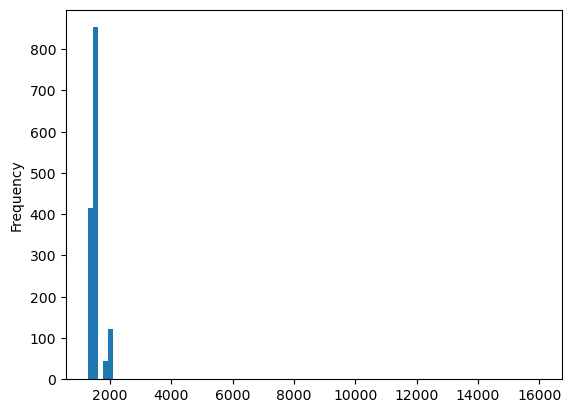

In [46]:
df['cc'].plot(kind = 'hist',bins = 90)

In [47]:
df.cc.isnull().sum()

0

In [48]:
df.cc.skew()

27.45219619846663

<AxesSubplot:>

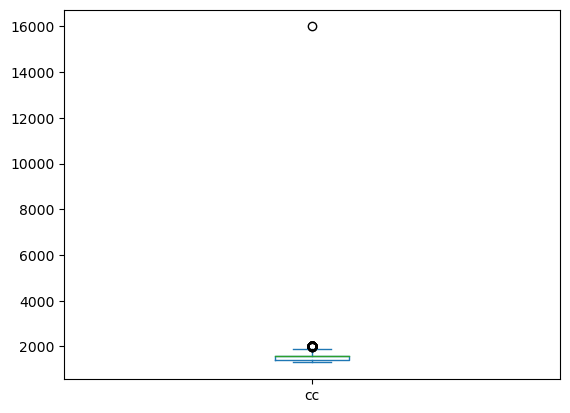

In [49]:
df.cc.plot(kind='box')

In [50]:
df[df['cc'] > 2000]

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
80,18950,25,20019,Petrol,110,1,16000,5,4,5,1180


# Weight Column

Minimum weight is 1000

Maximum weight is 1615

Average weight is 1072

The outliers have weight greater than 1400

No null values

Skewed data

In [51]:
df['Weight'].describe()

count    1435.000000
mean     1072.287108
std        52.251882
min      1000.000000
25%      1040.000000
50%      1070.000000
75%      1085.000000
max      1615.000000
Name: Weight, dtype: float64

<AxesSubplot:ylabel='Frequency'>

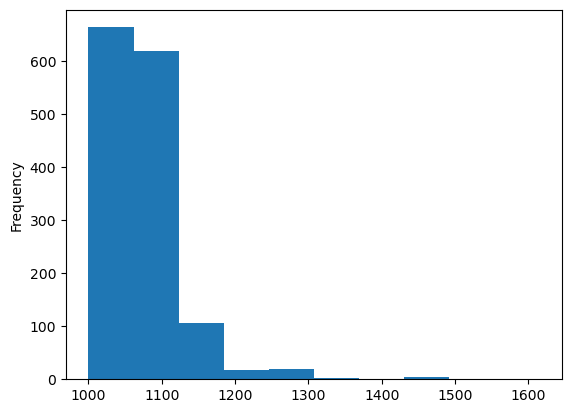

In [52]:
df['Weight'].plot(kind = 'hist')

<AxesSubplot:ylabel='Density'>

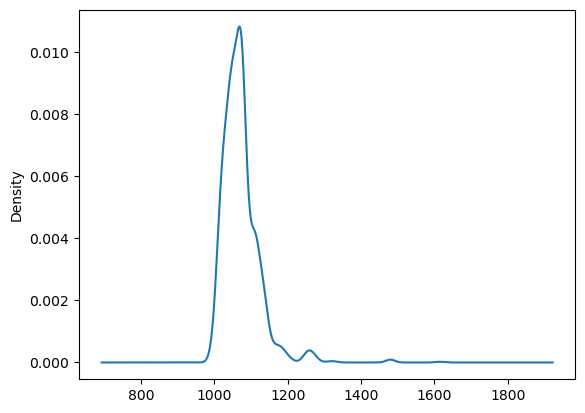

In [53]:
df['Weight'].plot(kind='kde')

In [54]:
df['Weight'].skew()

3.1165183382777437

In [55]:
df['Weight'].isnull().sum()

0

<AxesSubplot:>

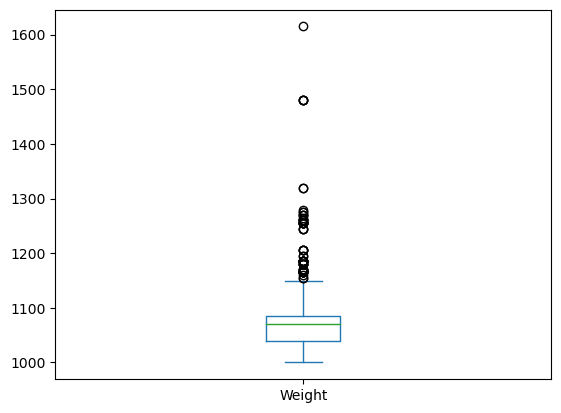

In [56]:
df['Weight'].plot(kind='box')

In [57]:
df[df['Weight'] > 1200].sort_values(by=['Weight'])

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
211,14750,40,80425,Diesel,90,0,2000,5,4,5,1205
188,11950,40,179860,Diesel,90,0,2000,5,4,5,1205
268,14750,40,48952,Diesel,90,0,2000,5,4,5,1205
197,14750,39,108847,Diesel,90,0,2000,5,4,5,1205
87,17950,20,66966,Diesel,90,0,2000,3,4,5,1245
6,16900,27,94612,Diesel,90,0,2000,3,4,5,1245
7,18600,30,75889,Diesel,90,0,2000,3,4,5,1245
48,17950,22,72215,Diesel,90,0,2000,5,4,5,1255
50,17950,22,62636,Diesel,90,0,2000,5,4,5,1255
121,19950,19,51099,Diesel,90,0,2000,5,4,5,1255


# Univatiate analysis on categorical column

In [58]:
# Categorical columns are: Fuel_Type, Automatic, Doors, Cylinders, Gears.

## Fuel_Type Column

There are 3 fuel type: Petrol, Diesel and CNG

Petrol being the fuel type used by most care and CNG being the least

88% cars uses Petrol as their fuel

In [59]:
df.Fuel_Type.value_counts()

Petrol    1264
Diesel     154
CNG         17
Name: Fuel_Type, dtype: Int64

<function matplotlib.pyplot.show(close=None, block=None)>

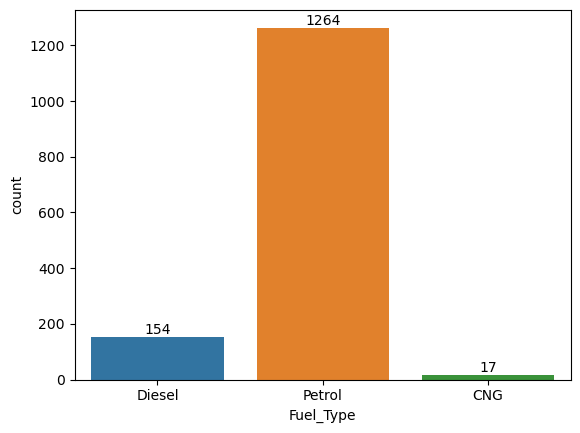

In [60]:
ax = sns.countplot(data = df , x = 'Fuel_Type')
for i in ax.containers:
    ax.bar_label(i)
plt.show

<AxesSubplot:ylabel='Fuel_Type'>

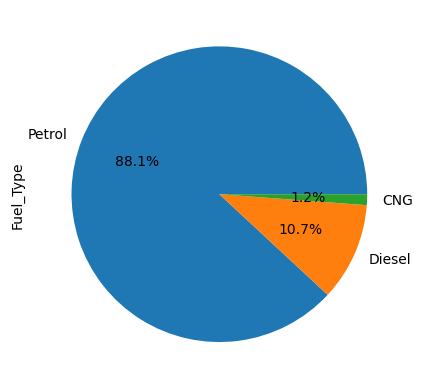

In [61]:
df['Fuel_Type'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

## Automatic Column

Either the car is automatic or not

There are 1355 manual cars and 80 automatic cars

Nearly 95% cars are manual

In [62]:
df.Automatic.value_counts()

0    1355
1      80
Name: Automatic, dtype: int64

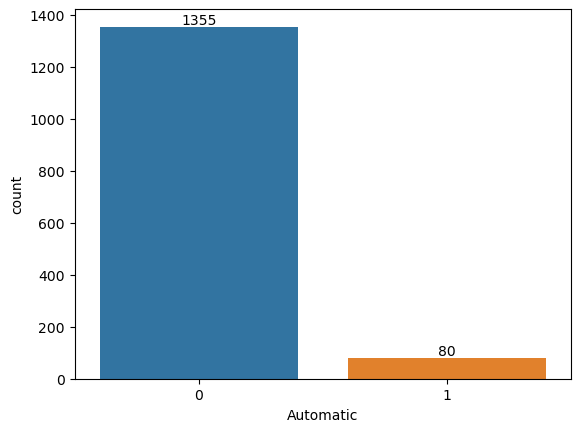

In [63]:
ax = sns.countplot(data = df, x = 'Automatic')
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:ylabel='Automatic'>

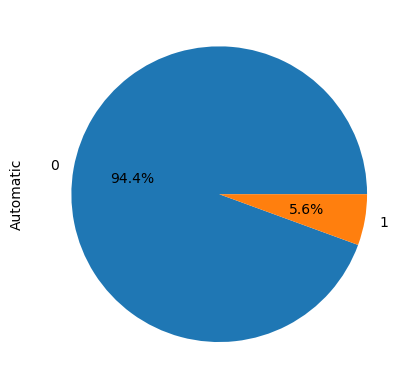

In [64]:
df['Automatic'].value_counts().plot(kind = 'pie', autopct = "%0.1f%%")

## Doors Column

The cars have either 5 doors, 3 doors, 4 doors or 2 doors.

The cars with 5 doors are in a number of 673 and the cars with 3 doors are in a number of 622

Cars with 2 doors are in the least number.

Cars with 5 and 3 doors are in a percentage of 46.9% and 43.3% respectively.

In [65]:
df.Doors.value_counts()

5    673
3    622
4    138
2      2
Name: Doors, dtype: int64

<AxesSubplot:ylabel='Doors'>

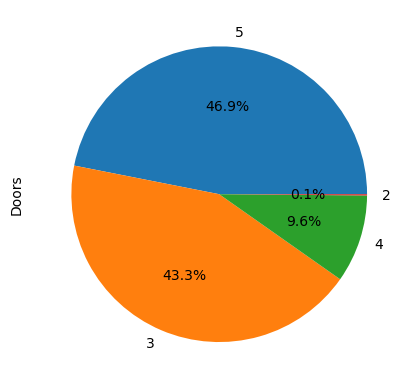

In [66]:
df['Doors'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

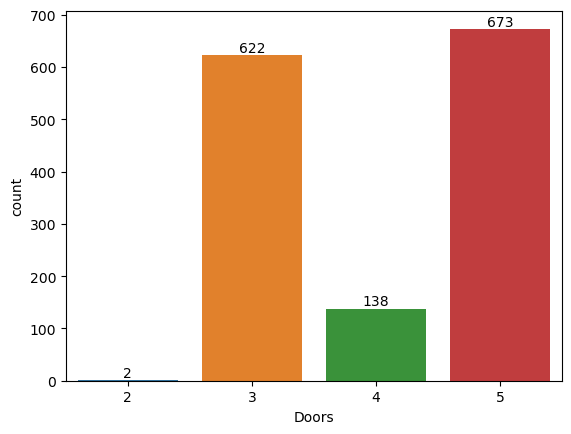

In [67]:
ax = sns.countplot(data = df, x = "Doors")
for i in ax.containers:
    ax.bar_label(i)

## Cylinders Column

All the cars have 4 cylinders.

So it doesn't have that much of an impact while predicting the price of the car. ( Not good for out model, just an extra feature which has 0 impact on the price of a car)

In [68]:
df.Cylinders.value_counts()

4    1435
Name: Cylinders, dtype: int64

## Gear Column

The number of cars with 5 gears is the highest with a number of 1389 and the number of cars with 4 gears are the lowest with the number of 1.

Nearly 97% of cars have 5 gears.

In [69]:
df.Gears.value_counts()

5    1389
6      43
3       2
4       1
Name: Gears, dtype: int64

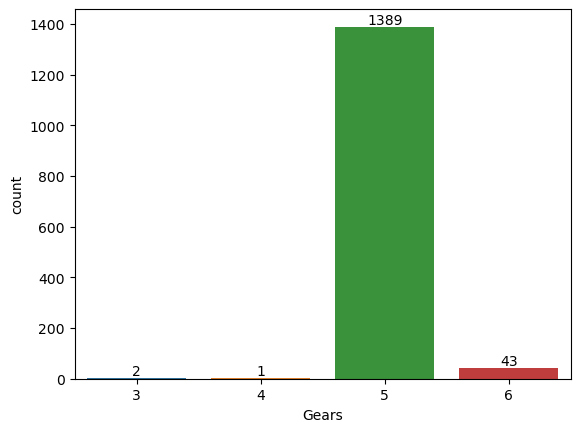

In [70]:
ax = sns.countplot(data = df,x ='Gears')
for i in ax.containers:
    ax.bar_label(i)

<AxesSubplot:ylabel='Gears'>

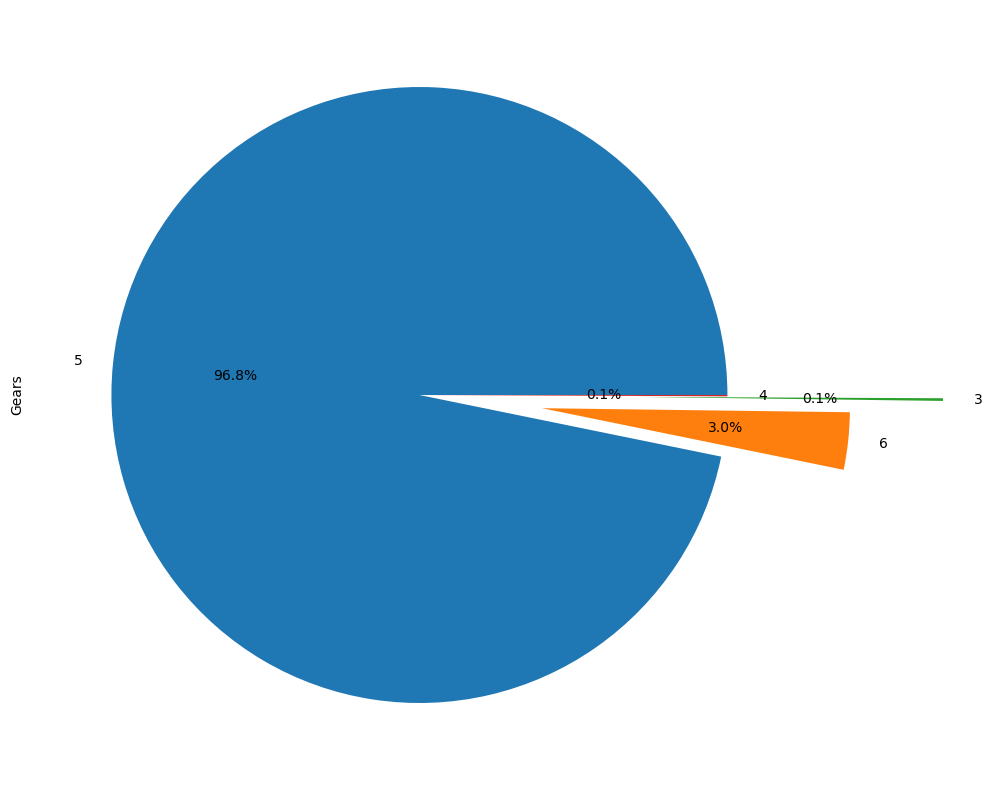

In [71]:
plt.figure(figsize = (10,10))
df['Gears'].value_counts().plot(kind = 'pie', autopct = "%0.1f%%", explode = [0 , 0.4 , 0.7 ,0])

## Bivariate Analysis

Price VS KM

<AxesSubplot:xlabel='Price', ylabel='KM'>

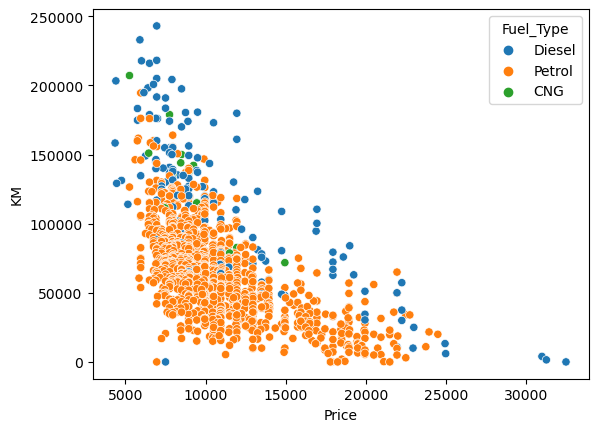

In [72]:
sns.scatterplot(data = df, x = 'Price', y = 'KM', hue = 'Fuel_Type')

<AxesSubplot:xlabel='Age', ylabel='Price'>

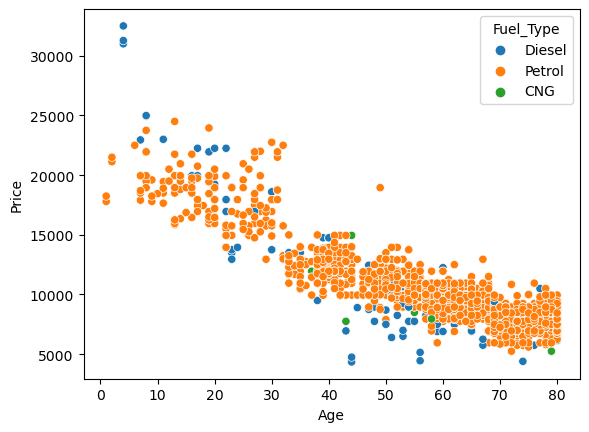

In [73]:
sns.scatterplot(data=df, x = 'Age', y = 'Price', hue = 'Fuel_Type')

<AxesSubplot:xlabel='Age', ylabel='KM'>

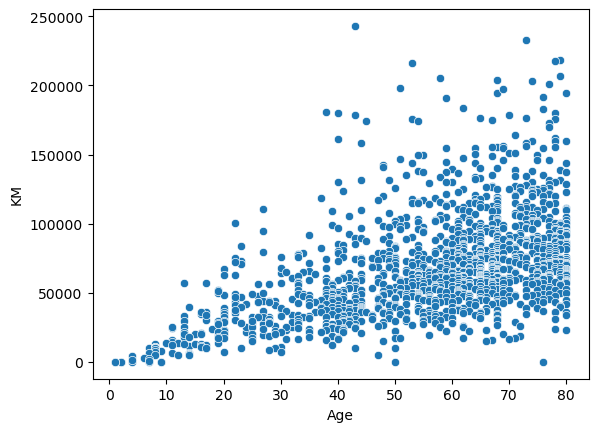

In [74]:
sns.scatterplot(data = df, x ='Age', y = 'KM')

<AxesSubplot:xlabel='HP', ylabel='Price'>

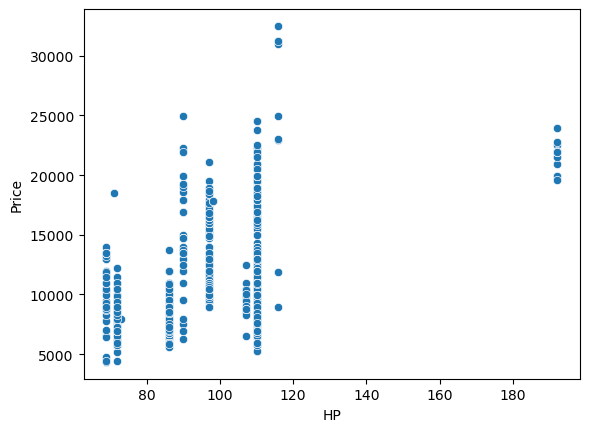

In [75]:
sns.scatterplot(data = df,x= 'HP', y = 'Price')

<AxesSubplot:xlabel='cc', ylabel='Price'>

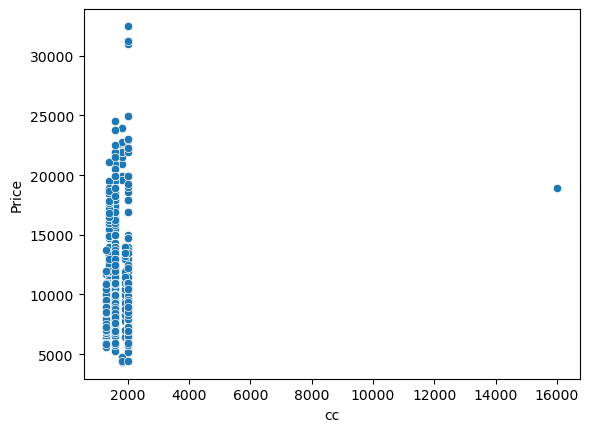

In [76]:
sns.scatterplot( data = df, x = 'cc', y = 'Price')

<AxesSubplot:xlabel='Weight', ylabel='Price'>

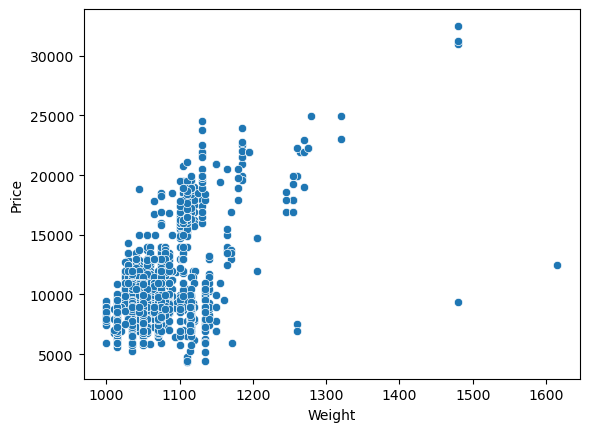

In [77]:
sns.scatterplot(data=df, x = 'Weight', y = 'Price')

<AxesSubplot:xlabel='Gears', ylabel='Price'>

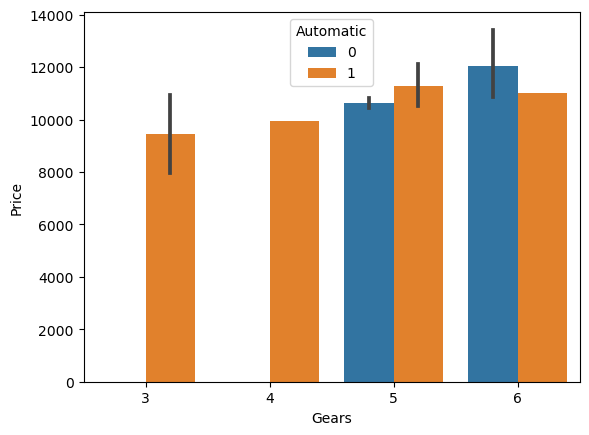

In [78]:
sns.barplot(data = df, x = 'Gears', y = 'Price', hue = 'Automatic')

In [79]:
df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

<AxesSubplot:xlabel='Automatic', ylabel='Price'>

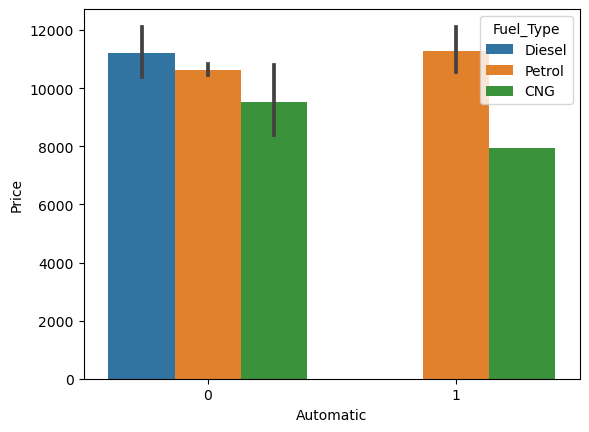

In [80]:
sns.barplot(data = df, x = 'Automatic', y = 'Price', hue='Fuel_Type')

Very less number of cars are automatic, which means people are more interested in buying manually driven cars.

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

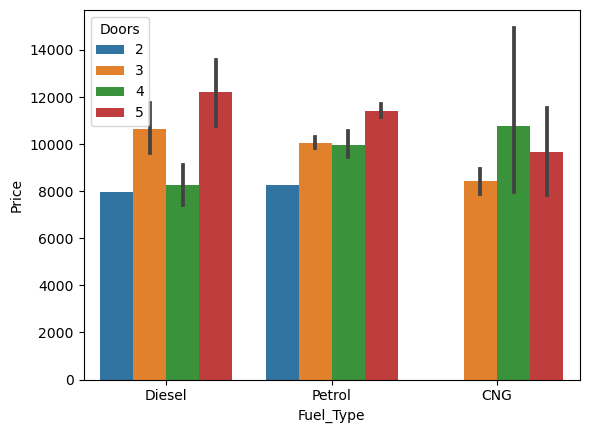

In [81]:
sns.barplot(data=df, y='Price',x ='Fuel_Type',hue = 'Doors')

Cars running on diesel are costlier comparing to the cars running on petrol and cng.

<AxesSubplot:xlabel='Fuel_Type', ylabel='cc'>

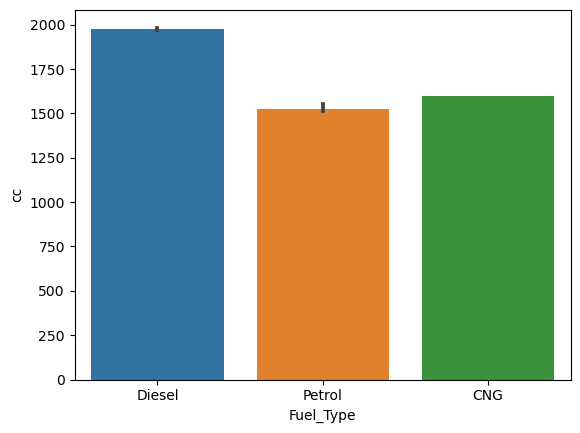

In [82]:
sns.barplot(data = df, x = 'Fuel_Type', y = 'cc')

<AxesSubplot:xlabel='Doors', ylabel='Price'>

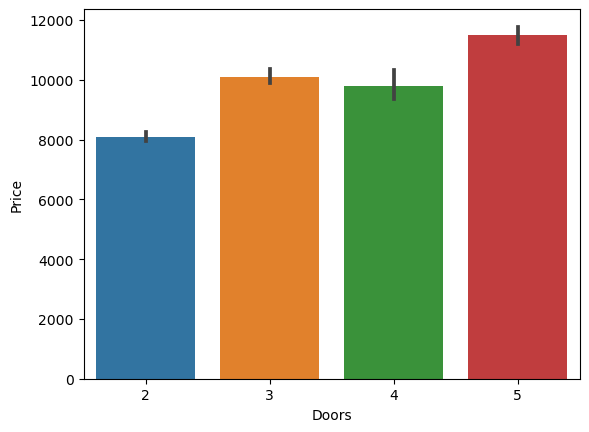

In [83]:
sns.barplot(data = df, x ='Doors', y = 'Price')

We can see that car with 2 doors is cheaper and car with 5 doors is most expensive.

In [84]:
df.describe()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


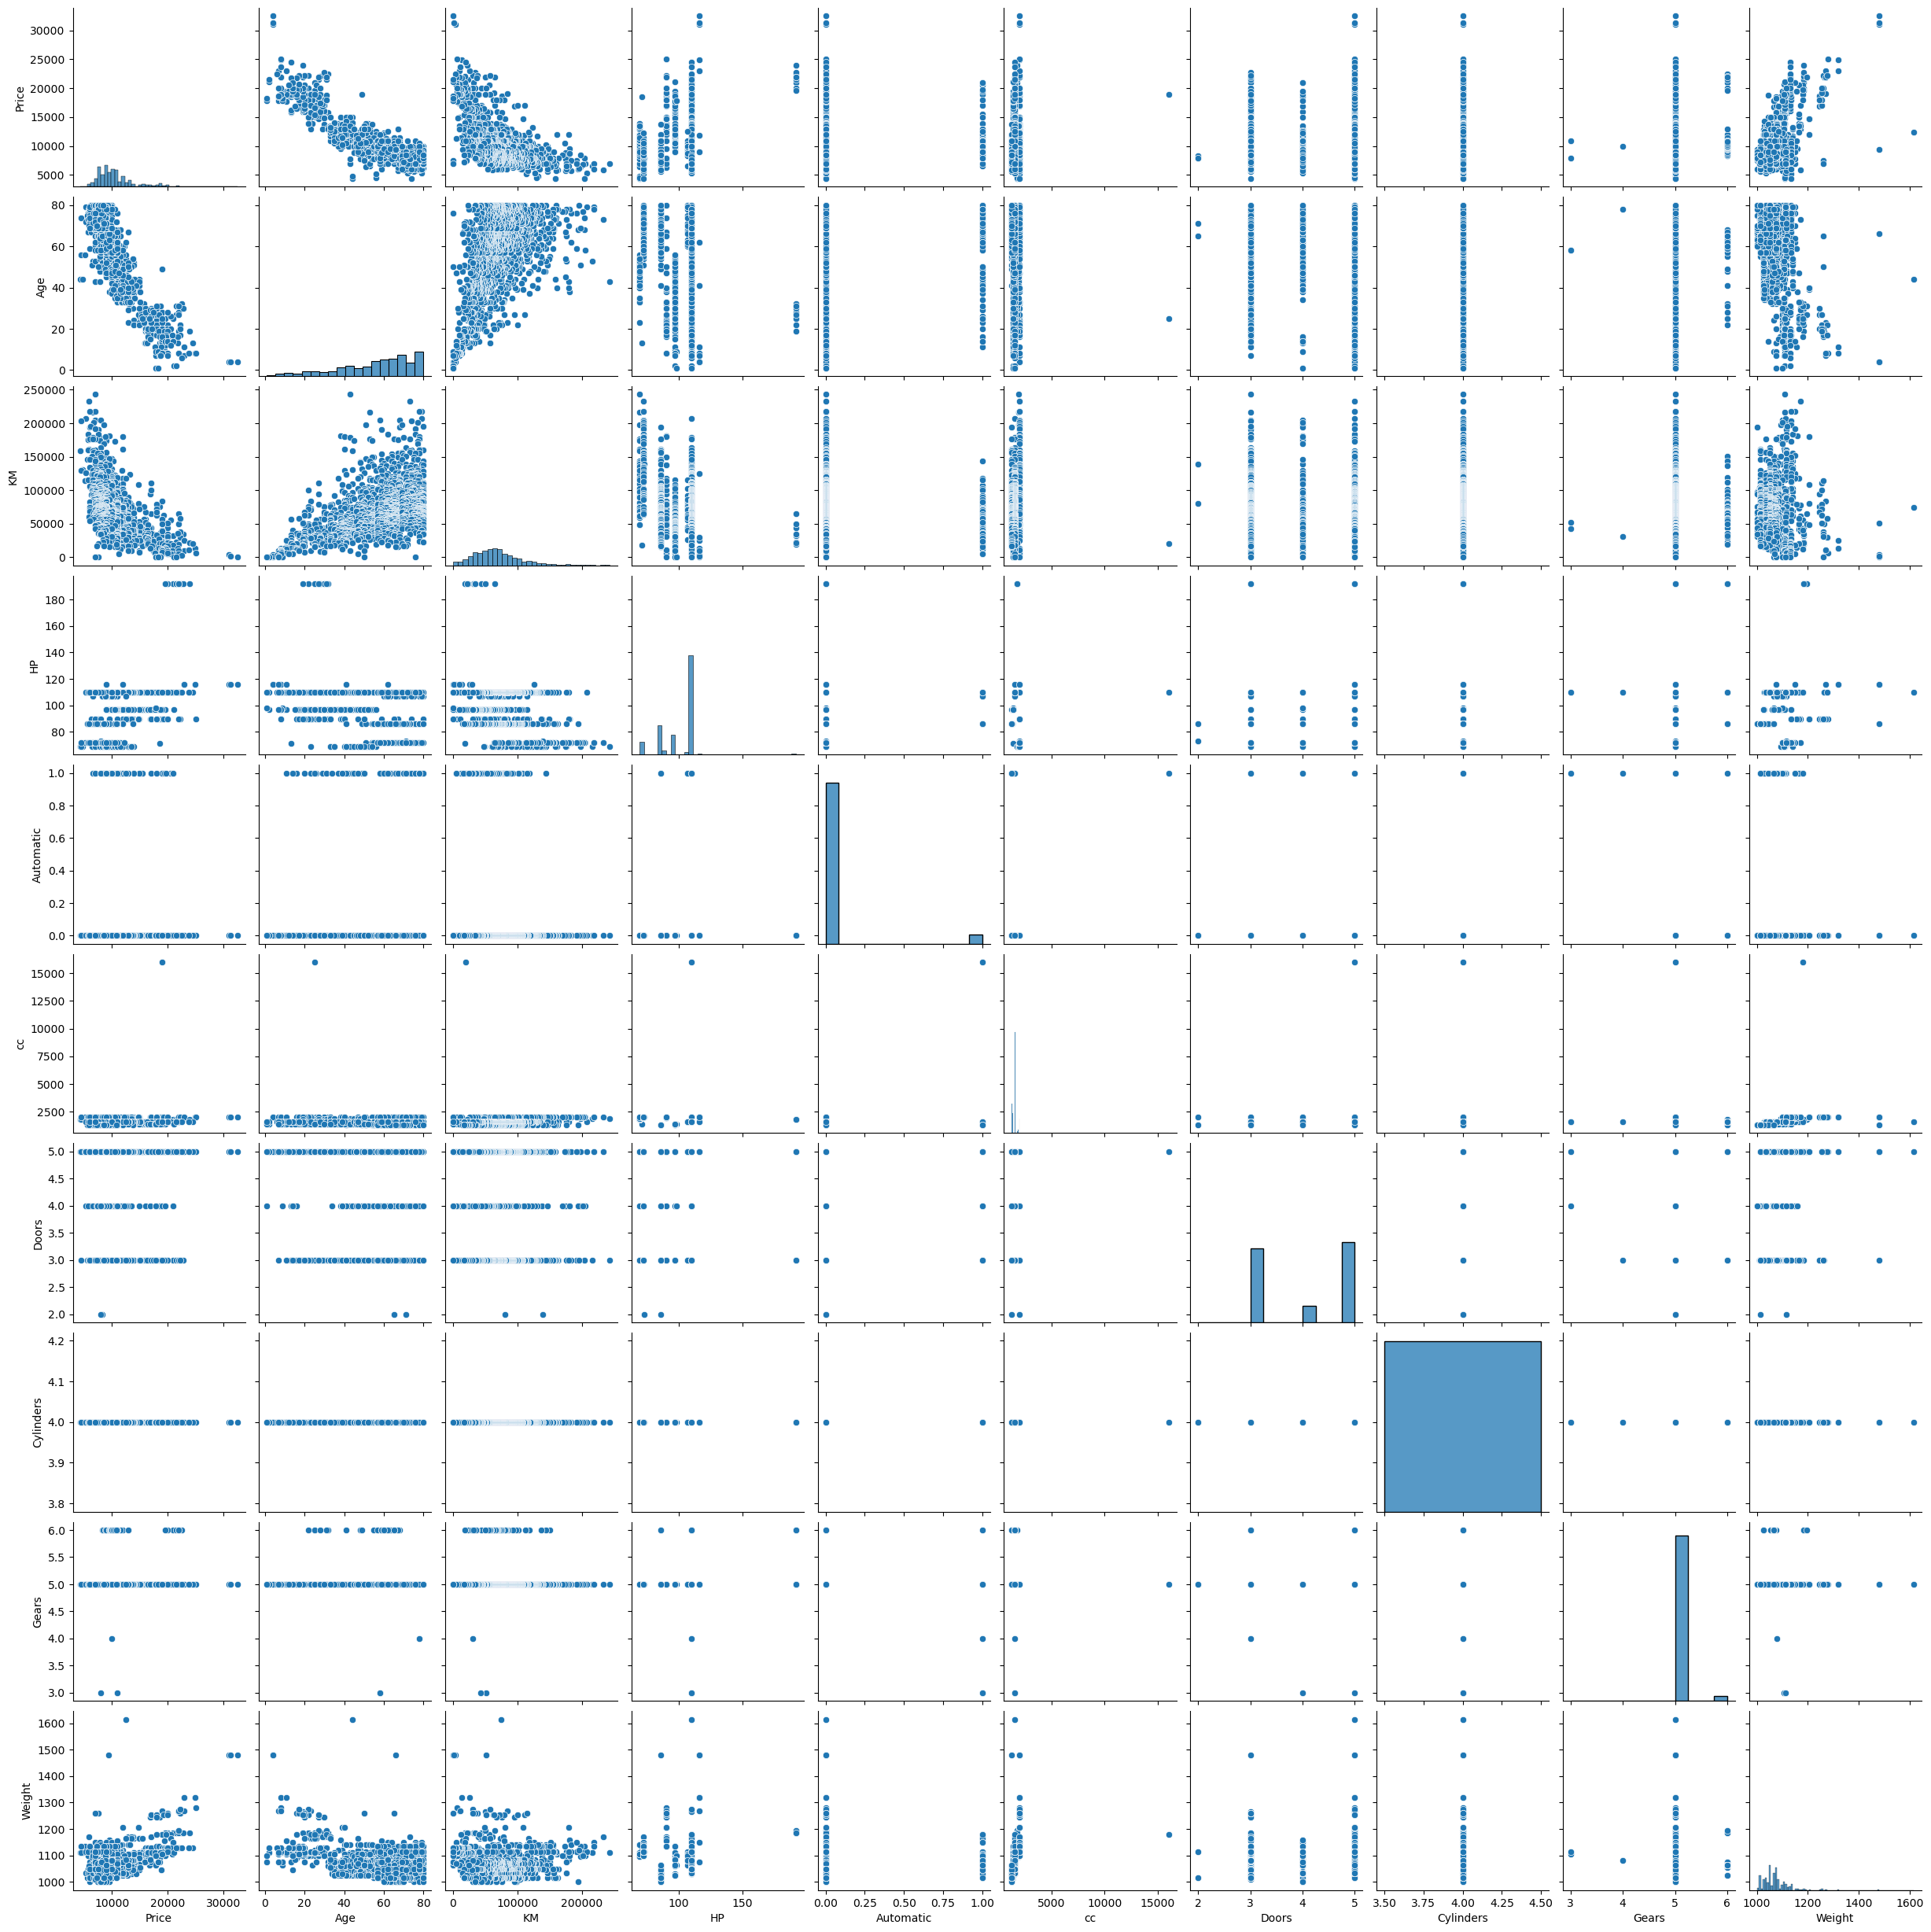

In [85]:
sns.pairplot(df)

<AxesSubplot:>

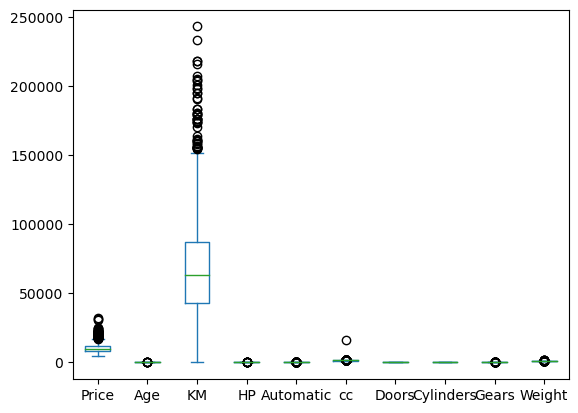

In [86]:
df.plot(kind='box')

In [87]:
new_df = df.drop(columns='Cylinders',axis = 1)

In [88]:
new_df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [89]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1435 non-null   int64 
 1   Age        1435 non-null   int64 
 2   KM         1435 non-null   int64 
 3   Fuel_Type  1435 non-null   string
 4   HP         1435 non-null   int64 
 5   Automatic  1435 non-null   int64 
 6   cc         1435 non-null   int64 
 7   Doors      1435 non-null   int64 
 8   Gears      1435 non-null   int64 
 9   Weight     1435 non-null   int64 
dtypes: int64(9), string(1)
memory usage: 155.6 KB


In [90]:
new_df['Fuel_Type'] = new_df['Fuel_Type'].map({'Petrol':3,'Diesel':2,'CNG':1})

In [91]:
new_df['Fuel_Type'].unique()

array([2, 3, 1], dtype=int64)

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

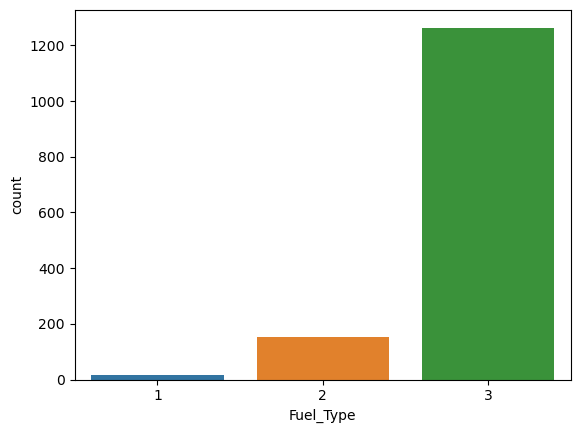

In [92]:
sns.countplot(data = new_df, x = 'Fuel_Type')

In [93]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1435 non-null   int64
 1   Age        1435 non-null   int64
 2   KM         1435 non-null   int64
 3   Fuel_Type  1435 non-null   int64
 4   HP         1435 non-null   int64
 5   Automatic  1435 non-null   int64
 6   cc         1435 non-null   int64
 7   Doors      1435 non-null   int64
 8   Gears      1435 non-null   int64
 9   Weight     1435 non-null   int64
dtypes: int64(10)
memory usage: 155.6 KB


<AxesSubplot:>

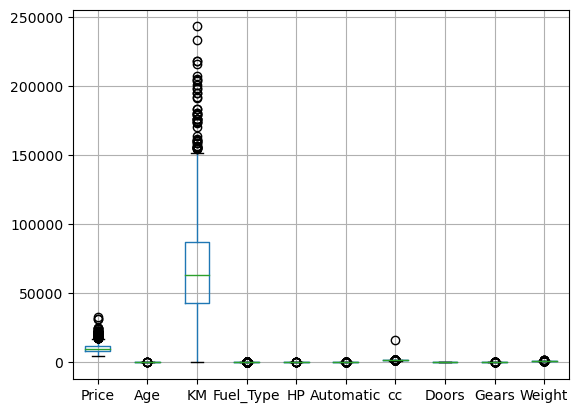

In [94]:
new_df.boxplot()

In [95]:
Q1 = np.quantile(new_df['KM'], 0.25)
Q3 = np.quantile(new_df['KM'], 0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + 1.5*IQR
Lower_limit = Q1 - 1.5*IQR

In [96]:
Lower_limit, Upper_limit

(-23062.25, 153103.75)

In [97]:
Outliers = []
for i in new_df['KM']:
    if((i>Upper_limit) or (i<Lower_limit)):
        Outliers.append(i)
print(Outliers) 
print(len(Outliers), "is the number of outliers present in the KM column")

[243000, 180638, 179860, 178858, 161000, 158320, 216000, 198167, 176000, 174139, 174000, 205000, 204250, 194545, 190900, 183500, 176184, 174833, 155720, 155500, 154783, 154462, 232940, 218118, 217764, 207114, 203254, 200732, 197501, 194765, 191620, 183277, 180378, 178800, 176177, 176000, 172980, 170000, 164000, 161775, 160000, 159968, 159908, 158492, 156204, 156169, 155210, 155000, 154900]
49 is the number of outliers present in the KM column


In [98]:
Outliers.sort()
print(Outliers)

[154462, 154783, 154900, 155000, 155210, 155500, 155720, 156169, 156204, 158320, 158492, 159908, 159968, 160000, 161000, 161775, 164000, 170000, 172980, 174000, 174139, 174833, 176000, 176000, 176177, 176184, 178800, 178858, 179860, 180378, 180638, 183277, 183500, 190900, 191620, 194545, 194765, 197501, 198167, 200732, 203254, 204250, 205000, 207114, 216000, 217764, 218118, 232940, 243000]


In [99]:
new_df = new_df[new_df['KM'] < 220000]

In [100]:
new_df

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Gears,Weight
0,13500,23,46986,2,90,0,2000,3,5,1165
1,13750,23,72937,2,90,0,2000,3,5,1165
2,13950,24,41711,2,90,0,2000,3,5,1165
3,14950,26,48000,2,90,0,2000,3,5,1165
4,13750,30,38500,2,90,0,2000,3,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,3,86,0,1300,3,5,1025
1432,10845,72,19000,3,86,0,1300,3,5,1015
1433,8500,71,17016,3,86,0,1300,3,5,1015
1434,7250,70,16916,3,86,0,1300,3,5,1015


In [101]:
Outliers = []
for i in new_df['KM']:
    if((i > Upper_limit) or (i< Lower_limit)):
        Outliers.append(i)
Outliers.sort()
print(Outliers)
print(len(Outliers), "is the number of outliers in the KM column")

[154462, 154783, 154900, 155000, 155210, 155500, 155720, 156169, 156204, 158320, 158492, 159908, 159968, 160000, 161000, 161775, 164000, 170000, 172980, 174000, 174139, 174833, 176000, 176000, 176177, 176184, 178800, 178858, 179860, 180378, 180638, 183277, 183500, 190900, 191620, 194545, 194765, 197501, 198167, 200732, 203254, 204250, 205000, 207114, 216000, 217764, 218118]
47 is the number of outliers in the KM column


In [102]:
Q1 = np.quantile(new_df['cc'] , 0.25)
Q3 = np.quantile(new_df['cc'] , 0.75)
IQR = Q3 - Q1
Upper_limit = Q3 + 1.5 * IQR
Lower_limit = Q1 - 1.5 * IQR
Outliers = []
for i in new_df['cc'] :
    if ((i > Upper_limit) or (i < Lower_limit)) :
        Outliers.append(i)
Outliers.sort()
print(Outliers)
print(len(Outliers) , "is the number of outliers present in the cc column")

[1975, 1995, 1995, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 16000]
121 is the number of outliers present in the cc column


In [103]:
new_df = new_df[new_df['cc'] < 2100]

<AxesSubplot:>

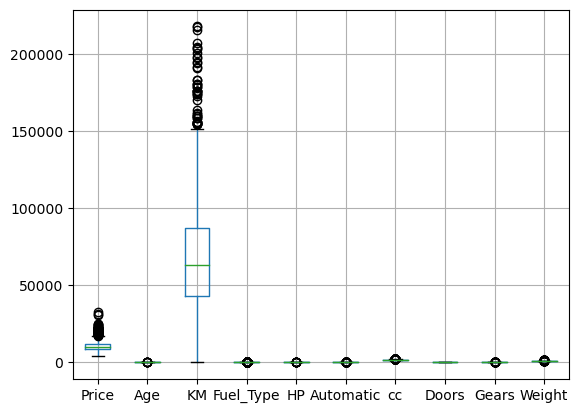

In [104]:
new_df.boxplot()

<AxesSubplot:>

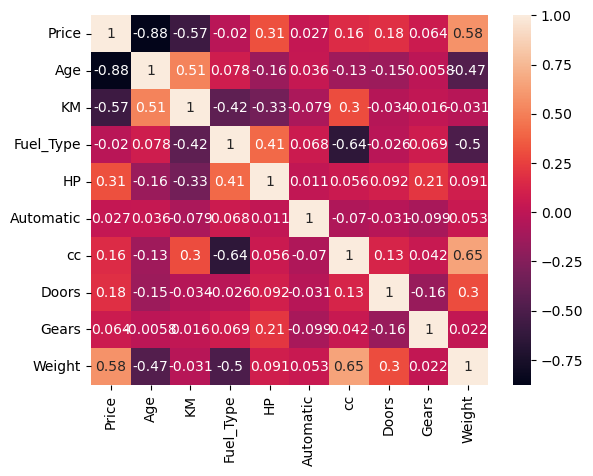

In [105]:
sns.heatmap(new_df.corr(), annot = True)

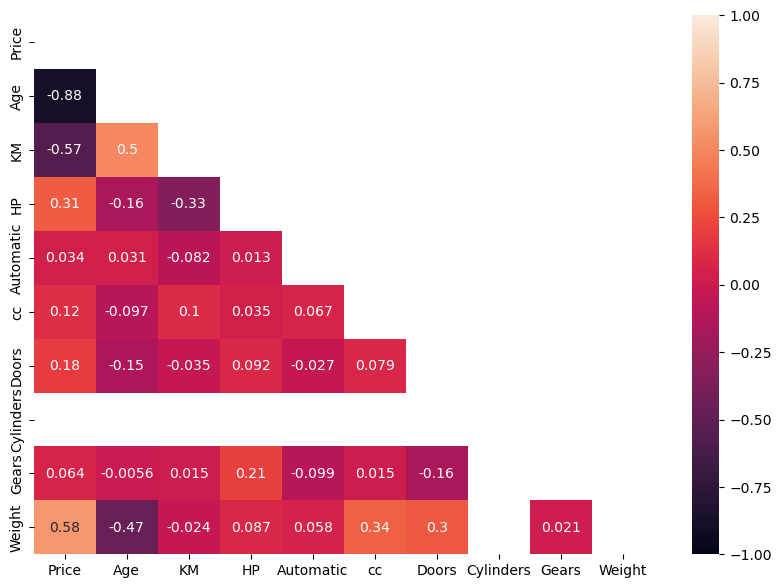

In [106]:
# set figure size
plt.figure(figsize=(10,7))

# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# generate heatmap
sns.heatmap(df.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.show()

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor #variance inflation factor to remove features with high variance

In [108]:
numerical_columns = new_df.drop(columns =['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price'] , axis = 1)
vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['Vif_score'] = [variance_inflation_factor(numerical_columns.values , i)
                        for i in range(len(numerical_columns.columns))] 
#vif score of all numerical features
            


In [109]:
vif_data

,Features,Vif_score
0,Age,13.324957
1,KM,8.264587
2,HP,51.758631
3,cc,135.548287
4,Weight,175.546305


vif_scores of weight and cc is a lot and needs to be sorted.
Instead of removing both at once, we will be removing them individually and we will see the changes occuring in the vif scores of other variable.
Let's first remove the weight feature and see how is this gonna affect other's vif_score.

In [110]:
numerical_columns = new_df.drop(columns=['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price','Weight'],axis =1)
vif_data = pd.DataFrame()
vif_data['Features']=numerical_columns.columns
vif_data['Vif_score'] = [variance_inflation_factor(numerical_columns.values,i)
                         for i in range(len(numerical_columns.columns))]
#here we are calcuating the vif after removing weight feature 

In [111]:
vif_data

,Features,Vif_score
0,Age,12.736653
1,KM,8.133399
2,HP,40.096717
3,cc,46.520998


we can notice that after removing the weight feature the vif score for all other variables has changed but it has changed majorly for cc .
We should be checking the vif score after removing cc as well.


In [112]:
numerical_columns = new_df.drop(columns = ['Fuel_Type' , 'Automatic' , 'Doors' , 'Gears' , 'Price' , 'cc' , 'Weight'], axis = 1)
vif_data = pd.DataFrame()
vif_data['Features'] = numerical_columns.columns
vif_data['Vif_score']= [variance_inflation_factor(numerical_columns.values, i)
                       for i in range(len(numerical_columns.columns))]
#calculating vif score of all numerical columns after removing weight column

In [113]:
vif_data

,Features,Vif_score
0,Age,12.661294
1,KM,5.910661
2,HP,7.618306


after removing the weight and cc, the vif score for rest of the features has drastically improved.

In [114]:
new_df.columns

Index(['Price', 'Age', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc', 'Doors',
       'Gears', 'Weight'],
      dtype='object')

In [115]:
new_df['Engine'] = new_df['cc']+ new_df['HP']+new_df['Fuel_Type']+new_df['Gears']#+new_df['Automatic']
new_df['Body'] = new_df['Doors'] + new_df['Weight'] #instead of removing these columns, merged them to create a ne column
#new_df['runtime'] =new_df['Age'] + new_df['KM']

C:\Users\DELL\AppData\Local\Temp\ipykernel_5628\698834833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Engine'] = new_df['cc']+ new_df['HP']+new_df['Fuel_Type']+new_df['Gears']#+new_df['Automatic']
C:\Users\DELL\AppData\Local\Temp\ipykernel_5628\698834833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Body'] = new_df['Doors'] + new_df['Weight'] #instead of removing these columns, merged them to create a ne column


In [116]:
new_df = new_df.drop(columns = ['Fuel_Type','HP','cc','Doors','Gears','Weight'],axis=1)

In [117]:
new_df

,Price,Age,KM,Automatic,Engine,Body
0,13500,23,46986,0,2097,1168
1,13750,23,72937,0,2097,1168
2,13950,24,41711,0,2097,1168
3,14950,26,48000,0,2097,1168
4,13750,30,38500,0,2097,1173
...,...,...,...,...,...,...
1431,7500,69,20544,0,1394,1028
1432,10845,72,19000,0,1394,1018
1433,8500,71,17016,0,1394,1018
1434,7250,70,16916,0,1394,1018


<AxesSubplot:>

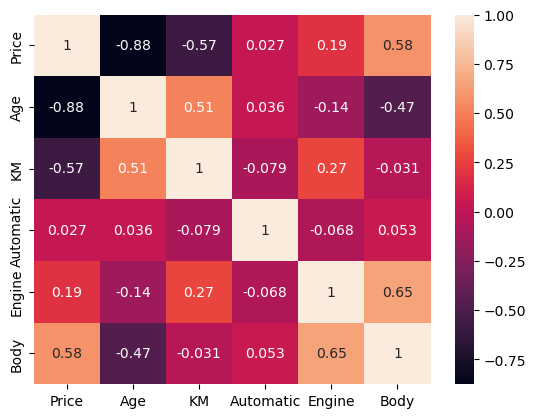

In [118]:
sns.heatmap(new_df.corr(),annot=True)

In [119]:
from sklearn.model_selection import train_test_split #creating the model

In [120]:
X = new_df.drop(columns = 'Price', axis = 1)
Y = new_df['Price']

In [121]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=49)

In [122]:
X_train #train data

,Age,KM,Automatic,Engine,Body
1307,80,69904,0,1718,1075
176,8,7000,0,1718,1120
1129,71,107516,0,1718,1053
282,39,45713,0,1505,1090
332,38,32781,0,1718,1080
...,...,...,...,...,...
456,54,71725,0,1718,1039
911,64,58136,0,1718,1080
1210,73,87000,0,1394,1018
427,54,84598,0,1718,1080


In [123]:
Y_train

1307     9950
176     18950
1129     7750
282     12850
332     11950
        ...  
456     10950
911      9950
1210     7950
427     12500
429     12950
Name: Price, Length: 1145, dtype: int64

In [124]:
print("shape of X_train is: ",X_train.shape)
print("shape of Y_train is: ",Y_train.shape)
print("shape of X_test is: ", X_test.shape)
print("shape of Y_test is: ", Y_test.shape)
#checking the shapes of datasets for training and testing

shape of X_train is:  (1145, 5)
shape of Y_train is:  (1145,)
shape of X_test is:  (287, 5)
shape of Y_test is:  (287,)


In [125]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
stdscaler = StandardScaler()
mmscaler = MinMaxScaler()

## Feature Scaling


In [126]:
stdscaler.fit(X_train)

StandardScaler()

In [127]:
X_train_stdscaled = stdscaler.transform(X_train)

In [128]:
X_test_stdscaled = stdscaler.transform(X_test)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
MLR = LinearRegression()

In [131]:
MLR.fit(X_train_stdscaled, Y_train)
y_pred = MLR.predict(X_test_stdscaled)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [132]:
r2_score(y_pred, Y_test) #stdscaler

0.8350725052561807

In [133]:
mean_squared_error(y_pred, Y_test)

1750257.1020236851

In [134]:
mean_absolute_error(y_pred, Y_test)

976.1696403406048

In [135]:
mmscaler.fit(X_train)

MinMaxScaler()

In [136]:
X_train_mmscaled = mmscaler.transform(X_train)
X_test_mmscaled = mmscaler.transform(X_test)

In [137]:
MLR.fit(X_train_mmscaled, Y_train)
y_pred2 = MLR.predict(X_test_mmscaled)

In [138]:
r2_score(y_pred2, Y_test) #minmaxscaler

0.8350725052561807

In [139]:
mean_squared_error(y_pred2, Y_test)

1750257.1020236851

In [140]:
mean_absolute_error(y_pred2, Y_test)

976.1696403406053

In [141]:
MLR.fit(X_train, Y_train)
y_pred3 = MLR.predict(X_test) #without scaling

In [142]:
r2_score(y_pred3, Y_test) #without scaling

0.8350725052561803

In [143]:
mean_squared_error(y_pred3, Y_test)

1750257.1020236758

In [144]:
mean_absolute_error(y_pred3, Y_test)

976.1696403406006

The model without scaling the data works perfectly

In [145]:
import pickle

In [146]:
pickle.dump(MLR, open( "MLRASSIGNMENT1.pkl" , "wb")) #saving model

In [147]:
prediction = pickle.load(open('MLRASSIGNMENT1.pkl' , "rb"))

In [148]:
new_df.sample()

,Price,Age,KM,Automatic,Engine,Body
496,11750,54,58530,0,1718,1080


In [150]:
data = np.array([[41,24475,0,1718,1035]])

In [151]:
prediction.predict(data)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12743.50372772])

In [152]:
new_df.sample() #prediction2

,Price,Age,KM,Automatic,Engine,Body
833,10500,65,68000,0,1718,1080


In [153]:
data = np.array([[68, 70000,0,1394,1018]])
prediction.predict(data)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8176.75267658])